In [50]:
import pandas as pd
from plotnine import *

# Ex. 2)
Nas Seções 11.1 a 11.12 em [39], o estatístico Rafael A. Irizarry destaca 11 conjuntos de problemas que podem aparecer nos gráficos gerados pela biblioteca ggplot2 (R)/plotnine (Python) e discute, quando pertinentes, soluções em R para contorná-los. Porte essas soluções em R para Python.

## 11.4)

In [3]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
url = "https://raw.githubusercontent.com/rafalab/dslabs/master/inst/extdata/murders.csv"

# Lendo o dataset em um DataFrame do pandas
df_murders = pd.read_csv(url)

df_murders.head()



,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


In [4]:
# Código original em R

# data(murders)
# murders |> mutate(murder_rate = total / population * 100000) |>
#   mutate(state = reorder(state, murder_rate)) |>
#   ggplot(aes(state, murder_rate)) +
#   geom_bar(stat="identity") +
#   coord_flip() +
#   theme(axis.text.y = element_text(size = 6)) +
#   xlab("")

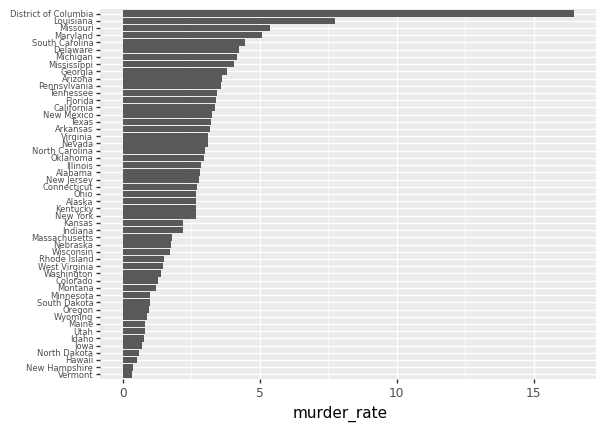

{<ggplot: (682629367)>}

In [5]:
# Código convertido para python

def calc_murder_rate(df):
    df['murder_rate'] = df['total'] / df['population'] * 100000.0
    return df

def reorder_df(df):
    df = df.sort_values(by='murder_rate', ascending=False)
    df['state'] = pd.Categorical(df['state'], categories=df['state'], ordered=True)
    return df

df = (df_murders
      .pipe(calc_murder_rate)
      .pipe(reorder_df))

{
    ggplot(df) + aes(x='reorder(state, murder_rate)', y ='murder_rate') + \
    geom_bar(stat='identity') + \
    coord_flip() + \
    theme(axis_text_y=element_text(size=6)) + \
    xlab("")
}

## 11.5)

In [6]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/heights.csv"

# Lendo o dataset em um DataFrame do pandas
df_heights = pd.read_csv(path)

display(df_heights.head())

,rownames,sex,height
0,1,Male,75.0
1,2,Male,70.0
2,3,Male,68.0
3,4,Male,74.0
4,5,Male,61.0


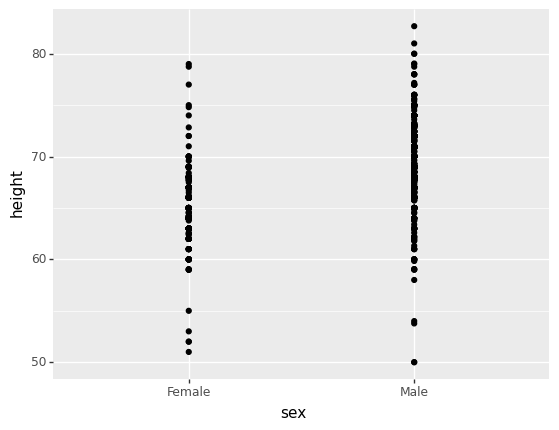

{<ggplot: (683048430)>}

In [7]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_point()

}

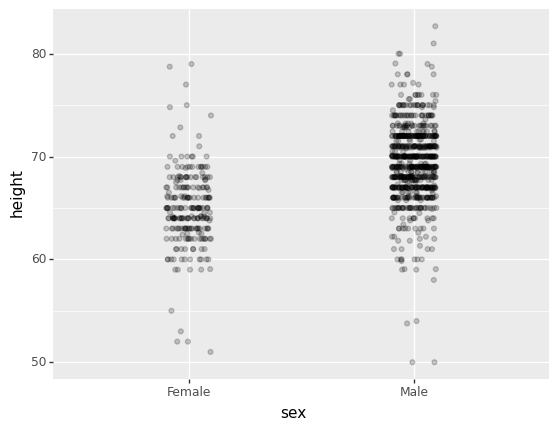

{<ggplot: (683081515)>}

In [8]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_jitter(width = 0.1, alpha = 0.2) 

}

## 11.6)

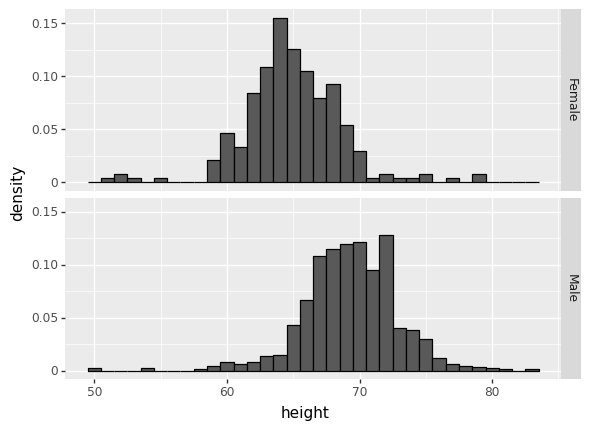

{<ggplot: (683134461)>}

In [9]:
{
    ggplot(df_heights) + aes(x='height', y ='..density..') + \
    geom_histogram(binwidth=1, color="black") + \
    facet_grid('sex ~ .')

}

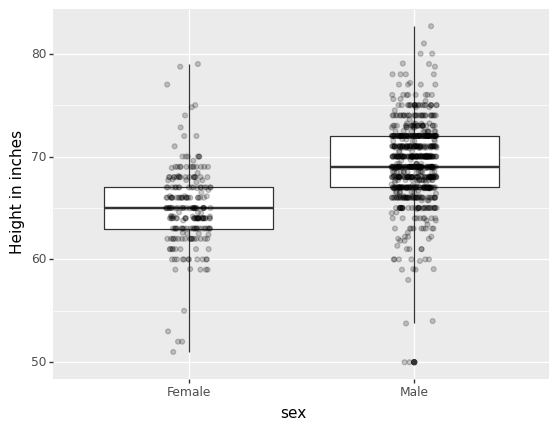

{<ggplot: (682631789)>}

In [10]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_boxplot(coef=3) + \
    geom_jitter(width = 0.1, alpha = 0.2) + \
    ylab("Height in inches")
}

## 11.8)

In [11]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/us_contagious_diseases.csv"

# Lendo o dataset em um DataFrame do pandas
df_diseases = pd.read_csv(path)

display(df_diseases.head())

,rownames,disease,state,year,weeks_reporting,count,population
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [51]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/gapminder.csv"

# Lendo o dataset em um DataFrame do pandas
df_gapminder = pd.read_csv(path)

west = ["Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand"]

def filter_west(df):
    return df[df['region'].isin(west)]

def filter_gapminder(df):
    df_filtered = df.copy(deep=True)
    df_filtered = df_filtered.loc[
        (df_filtered['year'].isin([2010, 2015])) &
        (df_filtered['region'].isin(west)) &
        (~pd.isna(df_filtered['life_expectancy'])) &
        (df_filtered['population'] > 10**7)
    ]

    return df_filtered

df_gapminder = df_gapminder.pipe(filter_gapminder)

display(df_gapminder.head())
print(df_gapminder.shape)

,rownames,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
9257,9258,Australia,2010,4.1,82.0,1.89,22162863.0,5.630494e+11,Oceania,Australia and New Zealand
9265,9266,Belgium,2010,3.6,80.1,1.84,10929978.0,2.671431e+11,Europe,Western Europe
9279,9280,Canada,2010,4.9,81.3,1.63,34126173.0,8.727845e+11,Americas,Northern America
9307,9308,France,2010,3.5,81.4,1.98,62961136.0,1.481000e+12,Europe,Western Europe
9312,9313,Germany,2010,3.5,80.3,1.39,80435307.0,2.069464e+12,Europe,Western Europe


(24, 10)


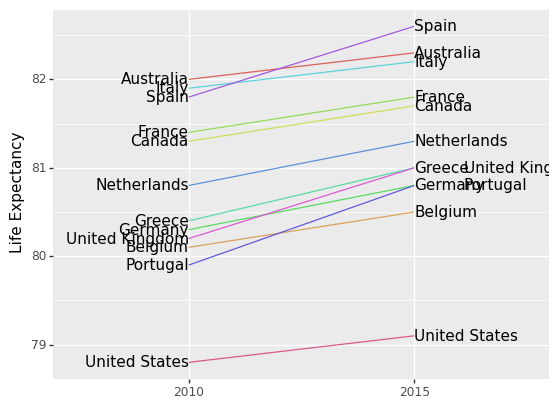

<ggplot: (693360993)>

In [52]:
# Mutate equivalente usando assign
df_gapminder_enriched = (df_gapminder.assign(location=lambda x: x['year'].apply(lambda y: 1 if y == 2010 else 2),
                  hjust=lambda x: x['year'].apply(lambda y: 'right' if y == 2010 else 'left'))
       .assign(location=lambda x: x.apply(lambda row: row['location'] + 0.22 if row['year'] == 2015 and row['country'] in ['United Kingdom', 'Portugal'] else row['location'], axis=1)))

df_gapminder_enriched['year'] = df_gapminder_enriched['year'].astype(str)

# Criando o gráfico com plotnine
(
    ggplot(df_gapminder_enriched, aes(x='year', y='life_expectancy', group='country')) +
        geom_line(aes(color='country'), show_legend=False) +
        geom_text(aes(x='location', label='country', hjust='hjust'), show_legend=False) +
        xlab('') + ylab('Life Expectancy')
)
